<a href="https://colab.research.google.com/github/shpark5938/VendingMachine/blob/main/2019112081_%EB%B0%95%EC%86%8C%ED%98%84_%EA%B0%9C%EB%B3%84%EC%97%B0%EA%B5%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 훈련용 이미지

# Use wget command to download the dataset from the link -> github link
!wget --no-check-certificate \
  https://github.com/shpark5938/VendingMachine/raw/main/tsc.zip \
  -O /tmp/tsc.zip

--2021-06-13 15:24:50--  https://github.com/shpark5938/VendingMachine/raw/main/tsc.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/shpark5938/VendingMachine/main/tsc.zip [following]
--2021-06-13 15:24:50--  https://raw.githubusercontent.com/shpark5938/VendingMachine/main/tsc.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55026478 (52M) [application/zip]
Saving to: ‘/tmp/tsc.zip’

/tmp/tsc.zip        100%[===================>]  52.48M   111MB/s    in 0.5s    

2021-06-13 15:24:51 (111 MB/s) - ‘/tmp/tsc.zip’ saved [55026478/55026478]



In [ ]:
# = 압축풀기 작업

import os
import zipfile

local_zip = '/tmp/tsc.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [ ]:
coke_dir = os.path.join('/tmp/tsc/coke')
morning_dir = os.path.join('/tmp/tsc/morning')
fanta_dir = os.path.join('/tmp/tsc/fanta')
welchs_dir = os.path.join('/tmp/tsc/welchs')
birak_dir = os.path.join('/tmp/tsc/birak')

coke_files = os.listdir(coke_dir)
morning_files = os.listdir(morning_dir)
fanta_files = os.listdir(fanta_dir)
welchs_files = os.listdir(welchs_dir)
birak_files = os.listdir(birak_dir)

print('Total number of training coke images:', len(coke_files))
print('Total number of training morning images:', len(morning_files))
print('Total number of training fanta images:', len(fanta_files))
print('Total number of training welches images:', len(welchs_files))
print('Total number of training birak images:', len(birak_files))

print(morning_files[:3])
print(fanta_files[:3])
print(welchs_files[:3])
print(birak_files[:3])

Total number of training coke images: 841
Total number of training morning images: 841
Total number of training fanta images: 841
Total number of training welches images: 841
Total number of training birak images: 839
['120.jpg', '406.jpg', '208.jpg']
['136.jpeg', '665.jpeg', '450.jpeg']
['120.jpg', '406.jpg', '208.jpg']
['120.jpg', '406.jpg', '208.jpg']
['136.jpeg', '665.jpeg', '450.jpeg']


/tmp/tsc/coke/120.jpg


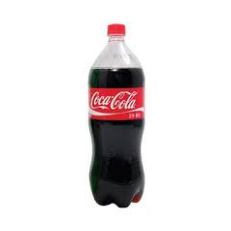

/tmp/tsc/coke/406.jpg


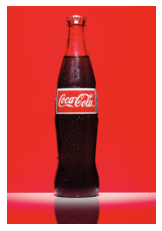

/tmp/tsc/coke/208.jpg


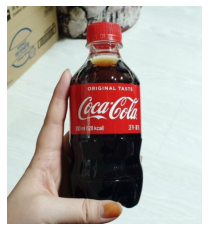

/tmp/tsc/coke/805.jpg


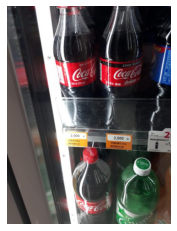

/tmp/tsc/coke/377.jpg


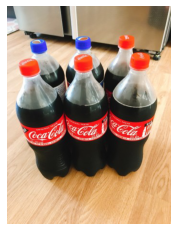

/tmp/tsc/coke/817.jpg


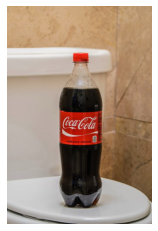

/tmp/tsc/coke/33.jpg


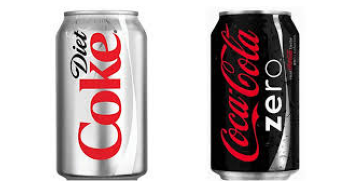

/tmp/tsc/coke/230.jpg


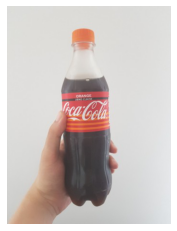

/tmp/tsc/coke/231.jpg


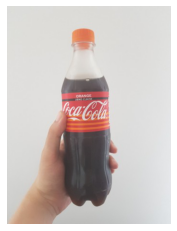

/tmp/tsc/morning/136.jpeg


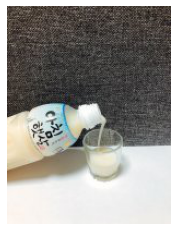

/tmp/tsc/morning/665.jpeg


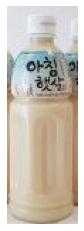

/tmp/tsc/morning/450.jpeg


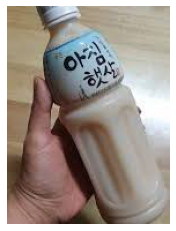

/tmp/tsc/morning/241.jpeg


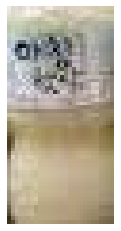

/tmp/tsc/morning/376.jpeg


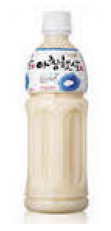

/tmp/tsc/morning/250.jpeg


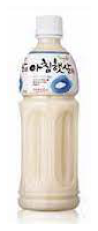

/tmp/tsc/morning/378.jpeg


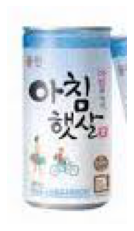

/tmp/tsc/morning/620.jpeg


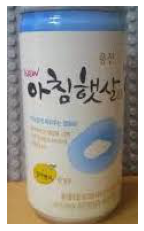

/tmp/tsc/morning/673.jpeg


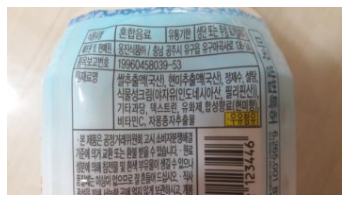

/tmp/tsc/fanta/120.jpg


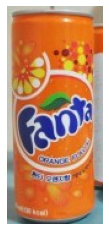

/tmp/tsc/fanta/406.jpg


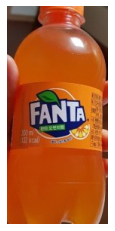

/tmp/tsc/fanta/208.jpg


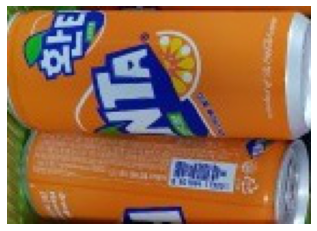

/tmp/tsc/fanta/805.jpg


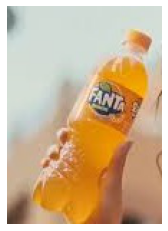

/tmp/tsc/fanta/377.jpg


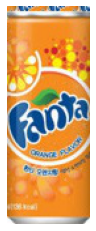

/tmp/tsc/fanta/817.jpg


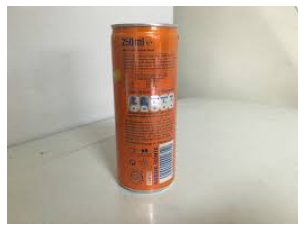

/tmp/tsc/fanta/33.jpg


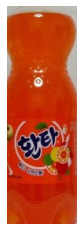

/tmp/tsc/fanta/231.jpg


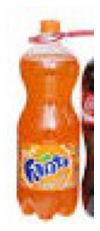

/tmp/tsc/fanta/376.jpg


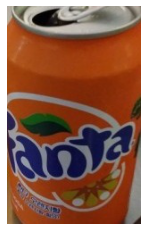

/tmp/tsc/welchs/120.jpg


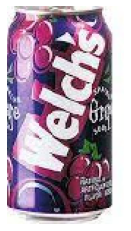

/tmp/tsc/welchs/406.jpg


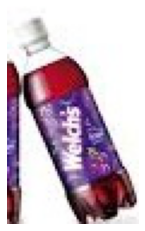

/tmp/tsc/welchs/208.jpg


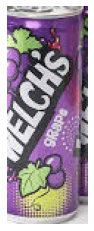

/tmp/tsc/welchs/805.jpg


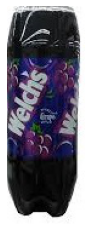

/tmp/tsc/welchs/377.jpg


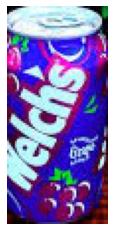

/tmp/tsc/welchs/817.jpg


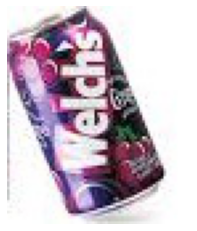

/tmp/tsc/welchs/33.jpg


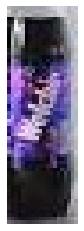

/tmp/tsc/welchs/230.jpg


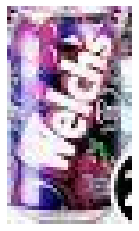

/tmp/tsc/welchs/231.jpg


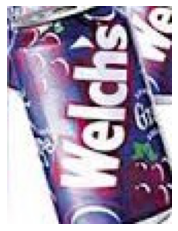

/tmp/tsc/birak/136.jpeg


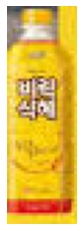

/tmp/tsc/birak/665.jpeg


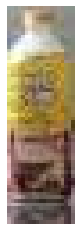

/tmp/tsc/birak/450.jpeg


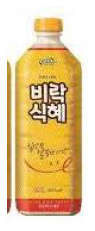

/tmp/tsc/birak/241.jpeg


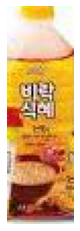

/tmp/tsc/birak/376.jpeg


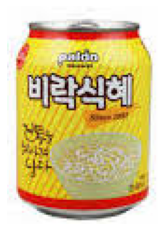

/tmp/tsc/birak/250.jpeg


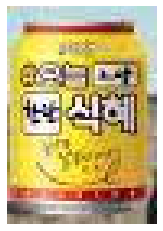

/tmp/tsc/birak/378.jpeg


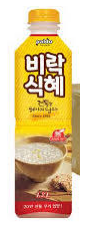

/tmp/tsc/birak/620.jpeg


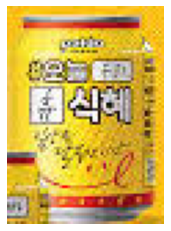

/tmp/tsc/birak/673.jpeg


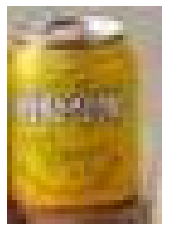

In [ ]:
# 이미지 출력 부분
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 9

next_coke = [os.path.join(coke_dir, fname) for fname in coke_files[pic_index-9:pic_index]]
next_morning = [os.path.join(morning_dir, fname) for fname in morning_files[pic_index-9:pic_index]]
next_fanta = [os.path.join(fanta_dir, fname) for fname in fanta_files[pic_index-9:pic_index]]
next_welchs = [os.path.join(welchs_dir, fname) for fname in welchs_files[pic_index-9:pic_index]]
next_birak = [os.path.join(birak_dir, fname) for fname in birak_files[pic_index-9:pic_index]]

for i, img_path in enumerate(next_coke + next_morning+next_fanta+next_welchs+next_birak):
  print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/tsc/"
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40, # 이미지 0-40도 돌림
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True, # 수평으로 돌림
    fill_mode='nearest')

train_generator = training_datagen.flow_from_directory(
TRAINING_DIR,
target_size=(150,150), # 150 픽셀 x 150 픽셀
class_mode='categorical',
batch_size=126 # 디폴트: 32
)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), # 첫 2D convolutional layer -> 64 nodes, 3x3 filter
                         activation='relu', input_shape=(150, 150, 3)), # 100x150 RGB 이미지 배열
  tf.keras.layers.MaxPooling2D(2, 2), # 최대 값을 가진 픽셀을 선택하여 작동하며, max-pooling(2x2)와 같은 크기의 새 그림이 됨
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(), # 그림배열은 1차원 배열로 평평해지고 숨겨진 계층에서 다시 처리됨
  tf.keras.layers.Dropout(0.5), 
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax') # class 개수만큼 index 변경
])


model.summary()

model.compile(loss = 'categorical_crossentropy', # 다중 클래스 분류 사례에 알맞은 함수
              optimizer='rmsprop', 
              metrics=['accuracy'] # 모델 성능을 모니터링 하기 위한 정확도 메트릭
              )

history = model.fit(train_generator, epochs=25, steps_per_epoch=20)

model.save("tsc.h5")

Found 4197 images belonging to 5 classes.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Co

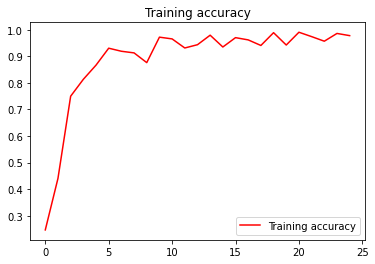

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.title('Training accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
print(train_generator.class_indices)

{'birak': 0, 'coke': 1, 'fanta': 2, 'morning': 3, 'welchs': 4}


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10) # 새로운 이미지 입력

  print(classes)

  if classes[0][0]==1:
   print(fn + " is birak")
  elif classes[0][1]==1:
   print(fn + " is coke")
  elif classes[0][2]==1:
    print(fn + " is fanta ")
  elif classes[0][3]==1:
    print(fn + " is morning ")
  elif classes[0][4]==1:
    print(fn + " is welchs ")

Saving 아침햇살6.jpeg to 아침햇살6 (1).jpeg
[[0. 0. 1. 0. 0.]]
아침햇살6.jpeg is fanta 
